In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications.resnet_v2 import ResNet152V2
from keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [8]:
IMAGE_SIZE = [224, 224]
data_dir="/content/drive/MyDrive/pdd_final"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!pip install split-folders

In [10]:
import splitfolders

splitfolders.ratio(data_dir, output="/content/drive/MyDrive/resnet_v2", seed=16, ratio=(0.8,0.2)) 

Copying files: 2751 files [01:14, 36.94 files/s]


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/resnet_v2/train'
valid_path = '/content/drive/MyDrive/resnet_v2/val'


In [3]:
#from tensorflow.python.keras.engine.base_layer import TensorFlowOpLayer
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet_152=ResNet152V2(
    include_top=False,
    weights="imagenet",
    input_shape=IMAGE_SIZE+[3],
    
)


In [4]:
from keras.applications import resnet_v2
# don't train existing weights
for layer in resnet_152.layers:
    layer.trainable = False
 

In [5]:
 # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/resnet_v2/train/*')


In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet_152.output)
prediction = Dense(len(folders), activation='softmax')(x)


In [7]:
 #create a model object
model = Model(inputs=resnet_152.input, outputs=prediction)


In [8]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/resnet_v2/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2193 images belonging to 19 classes.


In [12]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/resnet_v2/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 558 images belonging to 19 classes.


In [13]:
#fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
69/69 [==============================] - 73s 858ms/step - loss: 4.0850 - accuracy: 0.7305 - val_loss: 1.3043 - val_accuracy: 0.8943
Epoch 2/30
69/69 [==============================] - 56s 816ms/step - loss: 1.0505 - accuracy: 0.9102 - val_loss: 0.9795 - val_accuracy: 0.9265
Epoch 3/30
69/69 [==============================] - 54s 773ms/step - loss: 0.9488 - accuracy: 0.9311 - val_loss: 0.7851 - val_accuracy: 0.9427
Epoch 4/30
69/69 [==============================] - 54s 775ms/step - loss: 0.5094 - accuracy: 0.9594 - val_loss: 1.5044 - val_accuracy: 0.9283
Epoch 5/30
69/69 [==============================] - 55s 796ms/step - loss: 0.5112 - accuracy: 0.9599 - val_loss: 1.1839 - val_accuracy: 0.9301
Epoch 6/30
69/69 [==============================] - 52s 752ms/step - loss: 0.2826 - accuracy: 0.9749 - val_loss: 0.9938 - val_accuracy: 0.9534
Epoch 7/30
69/69 [==============================] - 54s 783ms/step - loss: 0.3332 - accuracy: 0.9745 - val_loss: 0.7422 - val_accuracy: 0.9695

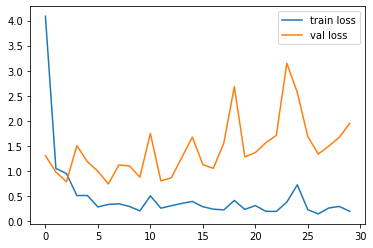

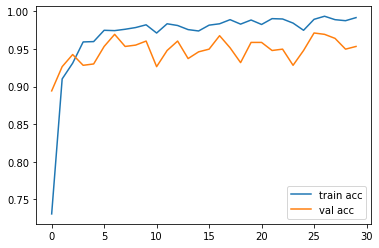

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/resnet_v2/model_resnet_v2.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [21]:
y_pred = model.predict(test_set)
y_pred

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([16,  2, 10, 10,  1,  1, 18,  8,  8,  4,  2,  2, 12,  4, 17,  3,  9,
       18, 15, 14, 18, 16, 15, 16, 12, 12,  2,  2, 12,  9,  4, 17, 14, 16,
        3,  1,  8, 17,  6,  4,  8,  1,  2,  1,  6, 10,  1,  2, 12, 18, 15,
       17, 13,  3, 15,  1,  1, 13, 16,  9, 13,  0,  1, 15, 15, 14, 11,  4,
       18,  5, 14, 16,  9, 13, 18,  0,  1,  5, 13, 11, 13,  4,  7,  9,  1,
        9, 12,  1, 10,  8, 16,  5,  5, 13,  1,  3,  6, 17, 18,  6, 15, 16,
        7,  3, 14, 14,  1,  2, 17, 13,  2,  1,  2,  4,  6,  7, 10,  5,  3,
       10,  3,  8, 14, 17,  0, 17,  1,  7,  6,  2,  2,  4,  9,  2, 14,  1,
       17, 14, 16,  8, 18,  4, 14,  2,  3,  7,  1,  6, 10, 18, 18, 10,  6,
       12,  0, 15,  4,  1,  5, 18,  1, 18,  8, 17, 13, 13, 15, 16,  9, 10,
        8,  9, 13,  1, 10,  2,  1,  8, 18,  8,  5,  2, 17,  0, 13, 10,  7,
       12, 10,  4, 15,  6, 11,  1,  9, 11,  4, 11,  8, 10, 13, 14, 14,  1,
        8,  1,  0, 17,  6, 18, 16, 16,  8,  1, 13,  4,  7,  4, 11, 18,  0,
       16,  9,  8,  1,  9

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('/content/drive/MyDrive/resnet_v2/model_resnet_v2.h5')

In [57]:
img=image.load_img('/content/drive/MyDrive/resnet_v2/test/tomato healthy.JPG',target_size=(224,224))

In [58]:
img.info

{'jfif': 257, 'jfif_density': (1, 1), 'jfif_unit': 0, 'jfif_version': (1, 1)}

In [59]:
x=image.img_to_array(img)
x

array([[[208., 201., 209.],
        [170., 163., 171.],
        [181., 174., 182.],
        ...,
        [141., 135., 149.],
        [119., 113., 127.],
        [112., 106., 120.]],

       [[137., 130., 138.],
        [138., 131., 139.],
        [145., 138., 146.],
        ...,
        [168., 162., 176.],
        [128., 122., 136.],
        [119., 113., 127.]],

       [[189., 182., 190.],
        [127., 120., 128.],
        [190., 183., 191.],
        ...,
        [161., 155., 169.],
        [165., 159., 173.],
        [128., 122., 136.]],

       ...,

       [[135., 123., 133.],
        [107.,  95., 105.],
        [137., 125., 135.],
        ...,
        [149., 137., 151.],
        [153., 141., 155.],
        [ 86.,  74.,  88.]],

       [[144., 132., 142.],
        [ 95.,  83.,  93.],
        [111.,  99., 109.],
        ...,
        [199., 187., 201.],
        [145., 133., 147.],
        [141., 129., 143.]],

       [[107.,  95., 105.],
        [167., 155., 165.],
        [176., 1

In [60]:
x.shape

(224, 224, 3)

In [61]:
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [62]:
model.predict(img_data)

array([[4.1233952e-20, 3.5504841e-19, 1.0523905e-10, 2.8293348e-10,
        1.6941267e-13, 2.6666589e-17, 5.4956658e-24, 1.0000000e+00,
        4.6546356e-17, 2.4672643e-16, 6.3283122e-19, 2.5924337e-18,
        3.1743990e-20, 2.7731531e-23, 4.4404408e-14, 5.3421256e-10,
        4.2051718e-12, 1.7199301e-12, 4.1750495e-16]], dtype=float32)

In [63]:
a=np.argmax(model.predict(img_data), axis=1)

In [64]:
a==1

array([False])

In [65]:
a==18

array([False])

In [66]:
a==17

array([False])

In [67]:
a==0

array([False])

In [68]:
a==14

array([False])

In [69]:
a

array([7])